
# Machine Learning Assignment #  
**Michael Elder**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

//Tried to import code from mysql server but couldnt connect
import mysql.connector
con = mysql.connector.connect(
  host="localhost:3307", user="root",
  password="root", database="mre_database")

---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
#IF WE BOOK OUT __#__HOUR APPOINTMENTS, HOW MANY APPOINTMENTS IN __#__DAYS CAN __#__ ROOMS BE BOOKED?

#number of hours per day(input)
numhours = 10
#number of days in the month(input)
numofdays = 22
#length of appts in hours is(main input for this application)
lengthofappts = 2
#number of appointments per room is the hours open/ length of all appts
numofapptsperroom = numhours/lengthofappts
#number of rooms(input)
numofrooms = 6
#number of appointments 
appts = numofapptsperroom * numofrooms * numofdays

print("The answer below is how many appointments can be in one month for all six rooms.")
print(appts)

The answer below is how many appointments can be in one month for all six rooms.
660.0


#INPUT DATA BELOW AND ASSIGN IT A VARIABLE SUCH AS DF

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS450/roomschedule.csv')


# Connecting to the server

from mysql.connector import connection
conn = connection.MySQLConnection(user = 'root', password= 'Verdie30',
                              host = 'localhost',
                              database = 'mre_database')
 print(conn)

REFERENCE https://www.geeksforgeeks.org/connect-mysql-database-using-mysql-connector-python/
 

### Statistical and Visual Exploration

In [ ]:
df.head()

,Date,StartTime,EndTime,PatientID,Doctor,Reason,FirstName,LastName,RoomNumber
0,1/2/2023,8:00:00,10:00:00,1,Jones,Shoulder,Jack,Williams,1
1,1/2/2023,10:00:00,12:30:00,2,Jones,Shoulder,Dorothy,Mccann,1
2,1/2/2023,13:30:00,15:30:00,3,Jones,Shoulder,Yaseen,Reynolds,1
3,1/2/2023,15:30:00,18:00:00,4,Jones,Shoulder,Gabriella,Pittman,1
4,1/2/2023,8:00:00,10:00:00,5,Smith,Shoulder,James,Diaz,2


### Splitting Data into Train/Test

In [ ]:
df.dtypes

Date          object
StartTime     object
EndTime       object
PatientID      int64
Doctor        object
Reason        object
FirstName     object
LastName      object
RoomNumber     int64
dtype: object

In [ ]:
X = df[['Doctor','Reason']]
y = df[['RoomNumber']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [ ]:
cat_attribs = ['Reason', 'Doctor']


In [ ]:
col_transform = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_attribs)],
   
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
   ('mlg_model', LogisticRegression(max_iter=1000))
    
])

### Executing the Model

In [ ]:
pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Reason', 'Doctor'])])),
                ('mlg_model', LogisticRegression(max_iter=1000))])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        21
           4       0.93      1.00      0.96        13
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00        13

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



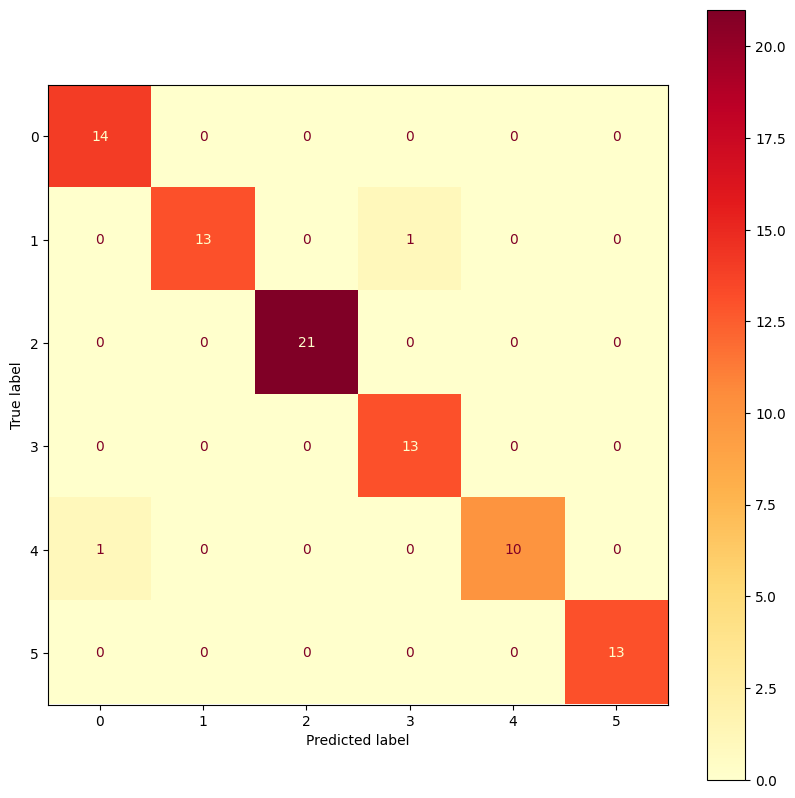

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="YlOrRd")


In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
   ('decision_tree', tree.DecisionTreeRegressor(max_depth=5))
    
])

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Reason', 'Doctor'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred1 = pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_test, y_pred)**0.5)

0.30499714066520933


In [ ]:
print(mean_squared_error(y_train, y_pred1)**0.5)

0.0
